# Chapter 2

This focuses on how to incorporate matrix math to numerically solve these quantum problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.linalg as la

In [2]:
def psi1D(n,x,L):
    return sqrt(2/L)*sin(n*math.pi*x/L)
def energy1D(n,L):
    return math.pi*math.pi*n*n/(2*L*L)

def integrate(x,y):
    result=0
    for i in range(1,nPoints,1):
        temp=(y[i]+y[i-1])/2*(x[i]-x[i-1])
        result+=temp
    return result

## Matrix creation and Matrix Math

The matrix can be made with potential and kinetic forms.  Then it can be diagonalized to get eigenvalues and eigenvectors.

In [3]:
nPoints=100
L=5
a=L/(nPoints+1)
t=1/(2*a*a)
def V(x):
    return 0

hMat=np.zeros((nPoints,nPoints))

for i in range(nPoints):
    for j in range(nPoints):
        if i==j:
            hMat[i][j]=V(i*a)+2*t
        elif i==j+1 or i==j-1:
            hMat[i][j]=-t
        else:
            hMat[i][j]=0

eigen,eigenv=la.eig(hMat)
eigenS=np.sort(eigen)
print(eigenS[0])

0.1973761735771728


## Comparissons between numerical and analytical states.

The values can be compared.  Notice that large errors exist for highly excited states.

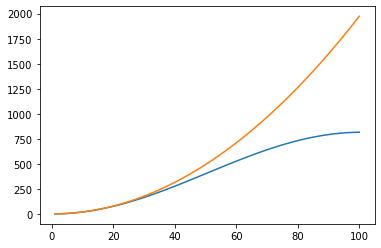

In [4]:
state=range(1,nPoints+1)
energy=np.array([])
for i in state:
    energy=np.append(energy,[energy1D(i,L)])
    
plt.plot(state,eigenS)
plt.plot(state,energy)

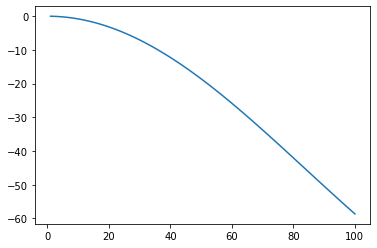

In [5]:
error=np.array([])

for i in range(nPoints):
    error=np.append(error,[(eigenS[i]-energy[i])/energy[i]*100])
    
plt.plot(state,error)

## Wavefunctions

Interestingly, the eigenvectors are the wavefunctions in this senario.  They are interestingly made, but can be extrapulated.

1.00


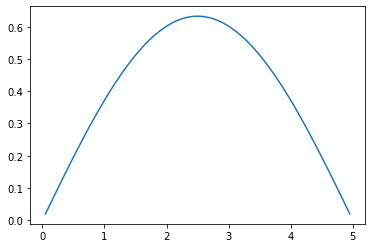

In [6]:
num=-1

for i in range(nPoints):
    if eigenS[0]==eigen[i]:
        num=i
        break

estate=eigenv/math.sqrt(a)

x=np.array([])
estate1=np.array([])
for i in range(nPoints):
    x=np.append(x,[(1+i)*a])
    estate1=np.append(estate1,[estate[i][num]])

plt.plot(x,estate1)

print("{0:.2f}".format(integrate(x,estate1*estate1)))

In [7]:
estatex=np.array([])
for i in range(nPoints):
    estatex=np.append(estatex,[estate1[i]*x[i]*estate1[i]])

print("{0:.2f}".format(integrate(x,estatex)))

2.50


## This method can explain unorthodox wavefunctions, like finite boxes.

In [8]:
nPoints=100
L=5
a=L/(nPoints+1)
t=1/(2*a*a)
def V(x):
    if x<L/4 or x>3*L/4: return 15
    return 0

hMat=np.zeros((nPoints,nPoints))

for i in range(nPoints):
    for j in range(nPoints):
        if i==j:
            hMat[i][j]=V(i*a)+2*t
        elif i==j+1 or i==j-1:
            hMat[i][j]=-t
        else:
            hMat[i][j]=0

eigen,eigenv=la.eig(hMat)
eigenS=np.sort(eigen)
print(eigenS[0])

0.6090450612768946


### Wavefunction #1

1.00


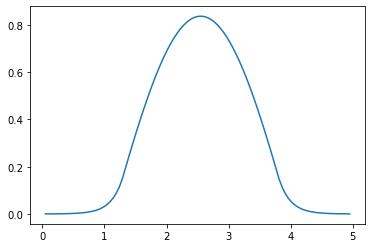

In [9]:
num=-1

for i in range(nPoints):
    if eigenS[0]==eigen[i]:
        num=i
        break

estate=eigenv/math.sqrt(a)

x=np.array([])
estate1=np.array([])
for i in range(nPoints):
    x=np.append(x,[(1+i)*a])
    estate1=np.append(estate1,[estate[i][num]])

plt.plot(x,estate1)

print("{0:.2f}".format(integrate(x,estate1*estate1)))

### Wavefunction #2

1.00


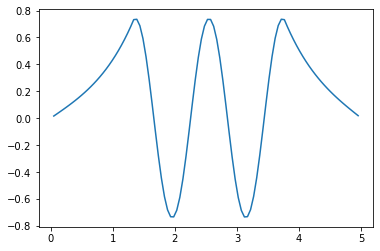

In [10]:
num=-1

for i in range(nPoints):
    if eigenS[4]==eigen[i]:
        num=i
        break

estate=eigenv/math.sqrt(a)

x=np.array([])
estate5=np.array([])
for i in range(nPoints):
    x=np.append(x,[(1+i)*a])
    estate5=np.append(estate5,[estate[i][num]])

plt.plot(x,estate5)

print("{0:.2f}".format(integrate(x,estate5*estate5)))